<a href="https://colab.research.google.com/github/Eddy265/DATA-ANALYTICS-REDI-INTERMEDIATE-/blob/main/Pandas_project_group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Odd

# Intro to Pandas:

1. What are the min, max and average number of rooms of the apartments in Köpenick?
2. How many apartments are there in Mitte in a 'well-kept' condition?

Transformations:

1. Is there a difference in average room space (`Space` divided by `Rooms`) for apartments built after 2000 versus apartments built before 2000?
2. How many apartments were posted each month?

Bonus:

1. Can you think about other KPIs for Immobilienscout? (It doesn't need to use only the data from this dataset)

In [ ]:
#!pip install plotly==4.14.3

In [ ]:
import pandas as pd

In [ ]:
# import plotly
# pd.options.plotting.backend='plotly'

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")

In [ ]:
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


# 1. What are the min, max and average number of rooms of the apartments in Köpenick?


In [ ]:
ko=df[df['Region']=='Köpenick'].groupby('Region') ['Rooms'].agg(['min', 'max', 'mean']).round(1)
ko

,min,max,mean
Region,,,
Köpenick,1.0,4.0,2.3


# 2. How many apartments are there in Mitte in a 'well-kept' condition?

In [ ]:
mitte=df_mitte=df.loc[(df['Region']=='Mitte') & (df['Condition']=='well_kept')]
a=df_mitte.Region.count()
print('There are {} apartments in a well kept condition in Mitte'.format(a))

There are 6 apartments in a well kept condition in Mitte


# Transformations:

# 1. Is there a difference in average room space (Space divided by Rooms) for apartments built after 2000 versus apartments built before 2000?

In [ ]:
# df['average_room_space']=(df['Space'] / df['Rooms'])
# df.head()

def average_room_space(x):
    return x.Space / x.Rooms

df['ave_room_space'] = df.apply(average_room_space, axis=1).round(2)
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,ave_room_space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,29.30
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61,41.80
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,42.80
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,44.14


In [ ]:
after=df[df['Year_Construction']>2000]
before=df[df['Year_Construction']<2000]

In [ ]:
a=round(after.ave_room_space.mean(),1)
b=round(before.ave_room_space.mean(),1)
# print('The average room space for apartments biult before 2000: {:.2f}'.format(b))
# print('The average room space for apartments biult after 2000: {:.2f}'.format(a))

In [ ]:
ans=pd.DataFrame({'After 2000':a, 'Before 2000':b}, index=['Average mean space'])
ans

,After 2000,Before 2000
Average mean space,32.6,33.8


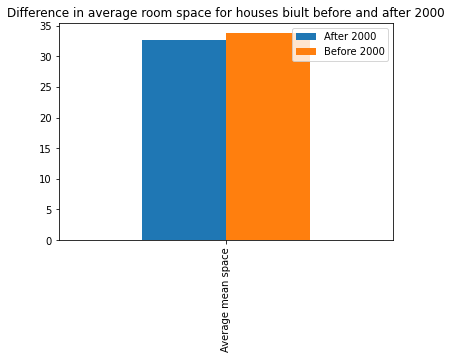

In [ ]:
ans.plot(kind='bar', title='Difference in average room space for houses biult before and after 2000')

# 2. How many apartments were posted each month?


Create another column for [posted_date]

In [ ]:
import numpy as np

df["posted_date"] = np.random.choice(pd.date_range('2021-01-01', '2021-12-31'), len(df))
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,ave_room_space,posted_date
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,29.30,2021-02-15
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,29.33,2021-09-20
2,Köpenick,well_kept,2.0,979.00,1997,83.61,41.80,2021-10-17
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,42.80,2021-04-05
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,44.14,2021-05-19


In [ ]:
df.isnull().sum()

Region               0
Condition            0
Rooms                0
Rent                 0
Year_Construction    0
Space                0
ave_room_space       0
posted_date          0
dtype: int64

In [ ]:
posted=df[['posted_date']].groupby(df.posted_date.dt.month).agg('count')
posted

,posted_date
posted_date,
1,78
2,60
3,81
4,65
5,59
6,65
7,56
8,43
9,49


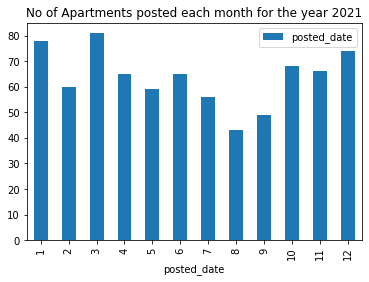

In [ ]:
posted.plot(kind='bar', title='No of Apartments posted each month for the year 2021')

# BONUS
Can you think about other KPIs for Immobilienscout? (It doesn't need to use only the data from this dataset)

# 1. Apartments Rented Per Available Inventory 

  Analyzes the number of apartments rented and compares it to the number of properties advertised.

# 2. Which region generates the highest amount of commission

# 3. Number of Days on Market

  How many days does it take from posting an apartment and renting it?



# 1. Apartments Rented Per Available Inventory

In [ ]:
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,ave_room_space,posted_date
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,29.30,2021-02-15
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,29.33,2021-09-20
2,Köpenick,well_kept,2.0,979.00,1997,83.61,41.80,2021-10-17
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,42.80,2021-04-05
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,44.14,2021-05-19


In [ ]:
from random import randrange
import datetime 
import numpy as np

start_date = datetime.datetime(2021, 3, 2)

def create_rented_date(start=start_date):
    
    if randrange(10)>10:
        return start_date + datetime.timedelta(days=randrange(365))
    return np.nan

# Add a new column `Sold_date` to our dataframe.
df['rented_date'] = df.posted_date.apply(lambda x: create_rented_date())


In [ ]:
df.rented_date.isnull().sum()

764

In [ ]:
df.head(5)

,Region,Condition,Rooms,Rent,Year_Construction,Space,ave_room_space,posted_date,rented_date,Commission,days_on_market
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,29.30,2021-02-15,2022-01-20,265.900,360 days
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,29.33,2021-09-20,NaT,120.000,-7 days
2,Köpenick,well_kept,2.0,979.00,1997,83.61,41.80,2021-10-17,2021-07-28,97.900,NaT
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,42.80,2021-04-05,2021-03-14,183.022,317 days
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,44.14,2021-05-19,NaT,227.200,NaT


In [ ]:
Apt_Rented_Per_Avail_Inventory=round((df.rented_date.notnull().sum()) / (df.posted_date.count())*100, 1)

In [ ]:
Apt_Rented_Per_Avail_Inventory
print('Apartments rented per Available inventory is {}%'.format(Apt_Rented_Per_Avail_Inventory))

Apartments rented per Available inventory is 70.7%


# 2. Which region generates on average the highest amount of commission

In [ ]:
df['Commission']=(df['Rent']*10/100)
# df['total'] = df['Condition'].map(df['Condition'].value_counts())
# df

In [ ]:
rent=df.loc[df.rented_date.notnull()]
rent.head(2)

,Region,Condition,Rooms,Rent,Year_Construction,Space,ave_room_space,posted_date,rented_date,Commission
0,Mitte,first_time_use,4.0,2659.0,2019,117.20,29.30,2021-02-15,2022-02-10,265.9
1,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33,29.33,2021-09-20,2021-09-13,120.0


In [ ]:
rent=df.loc[df.rented_date.notnull()]
commission_per_region=rent.groupby(['Region']) [['Commission']].sum().sort_values(by=['Commission'], ascending=[False])
commission_per_region

,Commission
Region,
Mitte,26699.314
Tiergarten,21663.252
Charlottenburg,10156.023
Prenzlauer,7073.473
Kreuzberg,6717.650
Wilmersdorf,6522.452
Köpenick,4932.424
Neukölln,4808.063
Friedrichsfelde,4225.504


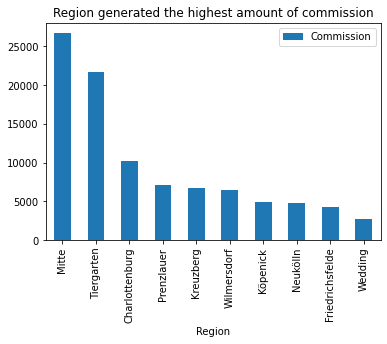

In [ ]:
commission_per_region.plot(kind='bar', title='Region generated the highest amount of commission')

# 3. Number of Days on Market

In [ ]:
df['days_on_market']=(df.rented_date-df.posted_date)
df.head(4)
# df['time']=df['posted_date'].sub(df['rented_date'], axis=0)

,Region,Condition,Rooms,Rent,Year_Construction,Space,ave_room_space,posted_date,rented_date,Commission,days_on_market
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,29.30,2021-02-15,2022-02-10,265.900,360 days
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,29.33,2021-09-20,2021-09-13,120.000,-7 days
2,Köpenick,well_kept,2.0,979.00,1997,83.61,41.80,2021-10-17,NaT,97.900,NaT
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,42.80,2021-04-05,2022-02-16,183.022,317 days


In [ ]:
mean_days=df.groupby(['Region']) [['days_on_market']].mean()

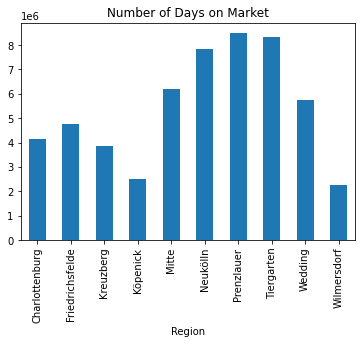

In [ ]:
mean_days['days_on_market'].astype('timedelta64[s]').plot.bar(title='Number of Days on Market')
#mean_days.plot.bar()